# Multivariate Fretech Distance


Fréchet distance uses the values from the feature layer for two sets of images, say reals and fakes, and compares different statistical properties between them to see how different they are. Specifically, Fréchet distance finds the shortest distance needed to walk along two lines, or two curves, simultaneously. The most intuitive explanation of Fréchet distance is as the "minimum leash distance" between two points. Imagine yourself and your dog, both moving along two curves. If you walked on one curve and your dog, attached to a leash, walked on the other at the same pace, what is the least amount of leash that you can give your dog so that you never need to give them more slack during your walk? Using this, the Fréchet distance measures the similarity between these two curves.

**Formula**

Based on the paper, "[The Fréchet distance between multivariate normal distributions](https://core.ac.uk/reader/82269844)" by Dowson and Landau (1982), the Fréchet distance between two multivariate normal distributions $X$ and $Y$ is:

$d(X, Y) = \Vert\mu_X-\mu_Y\Vert^2 + \mathrm{Tr}\left(\Sigma_X+\Sigma_Y - 2 \sqrt{\Sigma_X \Sigma_Y}\right)$

Similar to the formula for univariate Fréchet distance, you can calculate the distance between the means and the distance between the standard deviations. However, calculating the distance between the standard deviations changes slightly here, as it includes the matrix product and matrix square root. $\mathrm{Tr}$ refers to the trace, the sum of the diagonal elements of a matrix.

In [53]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns # This is for visualization

In [6]:
def matrix_sqrt(x):
    '''
    Function that takes in a matrix and returns the square root of that matrix.
    For an input matrix A, the output matrix B would be such that B @ B is the matrix A.
    Parameters:
        x: a numpy matrix
    '''
    y = sqrtm(x)
    return y

In [ ]:
def frechet_distance(mu_x, mu_y, sigma_x, sigma_y):
    '''
    Function for returning the Fréchet distance between multivariate Gaussians,
    parameterized by their means and covariance matrices.
    Parameters:
        mu_x: the mean of the first Gaussian, (n_features)
        mu_y: the mean of the second Gaussian, (n_features) 
        sigma_x: the covariance matrix of the first Gaussian, (n_features, n_features)
        sigma_y: the covariance matrix of the second Gaussian, (n_features, n_features)
    '''
    return np.linalg.norm(mu_x - mu_y) + np.trace(sigma_x + sigma_y - 2 * matrix_sqrt(sigma_x@sigma_y))

**Test function**

In [51]:
mean1 = np.array([0, 0]) # Center the mean at the origin
covariance1 = np.array( # This matrix shows independence - there are only non-zero values on the diagonal
    [[1, 0],
     [0, 1]]
)
dist1 = np.random.multivariate_normal(mean1, covariance1, 1000)

mean2 = np.array([0, 0]) # Center the mean at the origin
covariance2 = np.array( # This matrix shows dependence 
    [[2, -1],
     [-1, 2]]
)
dist2 = np.random.multivariate_normal(mean2, covariance2, 1000)

**Plot distributions**

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'subplot_spec'
  s)


<Figure size 1008x576 with 0 Axes>

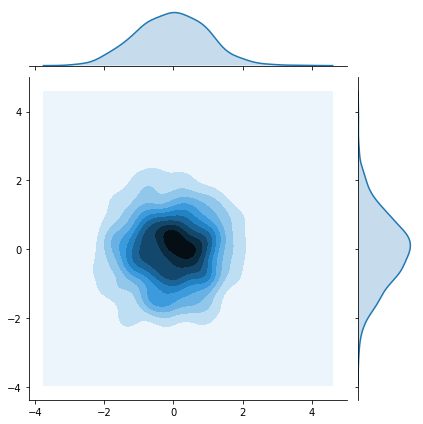

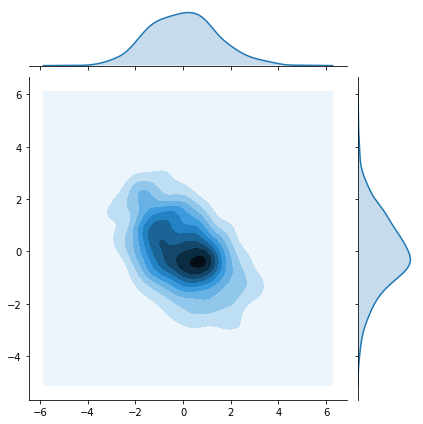

In [57]:
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,2, wspace=.2)

res1 = sns.jointplot(dist1[:, 0], dist1[:, 1], kind="kde", subplot_spec=gs[0])
res2 = sns.jointplot(dist2[:, 0], dist2[:, 1], kind="kde", subplot_spec=gs[1])
plt.show()

In [50]:
frechet_distance(
        np.mean(dist1), np.mean(dist2),
        np.cov(dist1, rowvar=False), np.cov(dist2, rowvar=False)
    )

0.6198570391879322